In [1]:
! ls /home/ian.harry/tmp_abi

template_bank  test  train  training_labels.csv


In [2]:
! ls /home/ian.harry/tmp_abi/train

0  1  2  3  4  5  6  7	8  9  a  b  c  d  e  f


In [3]:
! ls /home/ian.harry/tmp_abi/train/0

0  1  2  3  4  5  6  7	8  9  a  b  c  d  e  f


In [4]:
! ls /home/ian.harry/tmp_abi/train/0/0

0  1  2  3  4  5  6  7	8  9  a  b  c  d  e  f


In [5]:
! ls /home/ian.harry/tmp_abi/train/0/0/7

0070368f02.npy	0073cda446.npy	0076d47eb1.npy	007b2ad53c.npy	007dbcfd13.npy
0070464ca6.npy	0073e178eb.npy	0076edcb87.npy	007b3572b2.npy	007dfb499d.npy
00706448f9.npy	007439aad9.npy	00771b27f2.npy	007b38f309.npy	007dfb7f2d.npy
0070bc7a36.npy	00743c76f1.npy	0077573ba5.npy	007b6f3f0d.npy	007dff3965.npy
0070f27d97.npy	0074614d2a.npy	0077cebf70.npy	007ba361f3.npy	007e3e314c.npy
0070f42b88.npy	00746aeb2b.npy	0077e1427a.npy	007bb1f7bd.npy	007e4ae9de.npy
00712c043f.npy	00747ddb97.npy	0077e4709d.npy	007bd0e585.npy	007e745b16.npy
0071619ebb.npy	0074811ac8.npy	00785b7d45.npy	007beb0ff8.npy	007e766ac6.npy
00717728d9.npy	00748d6fe4.npy	00785f8167.npy	007bfc2b22.npy	007e858f65.npy
0071a0be96.npy	00748fab7e.npy	0078660a43.npy	007c080261.npy	007e85daa3.npy
0071f1fc87.npy	0074901b06.npy	0078c2fe2f.npy	007c1b2c45.npy	007f018d63.npy
007210cec8.npy	0074a4d752.npy	00790f8cb8.npy	007c1fb678.npy	007f04e123.npy
00723f17f5.npy	0074aae1aa.npy	007936d57c.npy	007c3a4d0e.npy	007f34f320.npy
007255c4a0.npy	0074b3fb38

In [6]:
!ls /home/ian.harry/tmp_abi/template_bank

templates_097.h5  templates_099.h5


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as py
import pandas as pd 
import pycbc
import glob, os
import math

%matplotlib inline
#pycbc specifically for gravitational wave astronomy. For more information on github, follow this link: https://github.com/gwastro/pycbc
import pycbc.noise
import pycbc.filter
import pycbc.psd
from pycbc.filter import highpass_fir, matched_filter
from pycbc.psd import welch, interpolate,inverse_spectrum_truncation
from pycbc.waveform import get_td_waveform, get_fd_waveform
from pycbc.waveform import td_approximants, fd_approximants

In [12]:
training_labels = pd.read_csv("/home/ian.harry/tmp_abi/training_labels.csv")
tl_sig=training_labels.loc[training_labels['target'] == 1]
tl_noise=training_labels.loc[training_labels['target'] == 0]
training_labels

,id,target
0,00000e74ad,1
1,00001f4945,0
2,0000661522,0
3,00007a006a,0
4,0000a38978,1
...,...,...
559995,ffff9a5645,1
559996,ffffab0c27,0
559997,ffffcf161a,1
559998,ffffd2c403,0


In [14]:
#Compute the PSD, code inspired from  my supervisor Ian Harry. 
data_in = glob.glob('/home/ian.harry/tmp_abi/train/0/0/*/*.npy')

det1_psd = None 
det2_psd = None 
det3_psd = None 
count = 0

for idx, filename in enumerate(data_in):
    file_id = filename.split("/")[8].split('.')[0]
    
    if label_dict['file'] == 1:
        continue
    count += 1
    example_arr = np.load(filename)
    det1 = pycbc.types.TimeSeries(example_arr[0], delta_t= 1./2048.)
    det2 = pycbc.types.TimeSeries(example_arr[1], delta_t= 1./2048.) 
    det3 = pycbc.types.TimeSeries(example_arr[2], delta_t= 1./2048.)
    window = np.hanning(4096) 
    
    det1 = det1*window
    det2 = det2*window
    det3 = det3*window 
    
    det1f = det1.to_frequencyseries()
    det2f = det2.to_frequencyseries()
    det3f = det3.to_frequencyseries()
    
    if count == 1:
        det1_psd = abs(det1f)
        det2_psd = abs(det2f)
        det3_psd = abs(det3f)
    else:
        det1_psd = (abs(det1f) + (count-1) * det1_psd)/count
        det2_psd = (abs(det2f) + (count-1) * det2_psd)/count 
        det3_psd = (abs(det3f) + (count-1) * det3_psd)/count
        
    det1_psd = det1_psd**2 * 4096/ (window*window).sum()
    det2_psd = det2_psd**2 * 4096/ (window*window).sum()
    det1_psd = det3_psd**2 * 4096/ (window*window).sum()
    

/local/abi.abraham/ipykernel_3449992/1692228776.py:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  py.pcolormesh(time, freq, power, vmax=15, vmin=0)


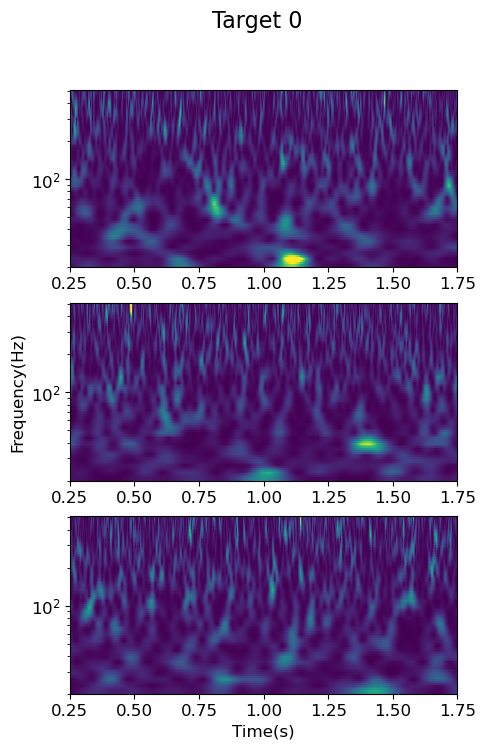

In [28]:
#reference from pyCBC making images by ALex Nitz - https://www.kaggle.com/code/alexnitz/pycbc-making-images/notebook
#Plotting q-scans
%matplotlib inline
data = glob.glob('/home/ian.harry/tmp_abi/train/0/0/0/0000c3b9c9.npy')

for fname in data:
    
    # load the specific 2s sample
    dat = np.load(fname)
    
    fig, axes = py.subplots(3, 1, figsize=[5,8], dpi=100)
    fig.suptitle('Target 0', fontsize=16)
    for i in range(3):
        # convert the data to a TimeSeries instance
        ts = pycbc.types.TimeSeries(dat[i, :], epoch=0, delta_t=1.0/2048) 
        
        # whiten the data (i.e. normalize the noise power at different frequencies)
        ts = ts.whiten(0.125, 0.125)
        
        # calculate the qtransform
        time, freq, power = ts.qtransform(.002, logfsteps=100, qrange=(10, 10), frange=(20, 512))

        py.sca(axes[i])
        py.pcolormesh(time, freq, power, vmax=15, vmin=0)
        py.xlim(.25, 1.75)
        py.yscale('log')
        py.sca(axes[2])
        py.xlabel('Time(s)')
        py.sca(axes[1])
        py.ylabel('Frequency(Hz)')
                  
    #py.show()
    q_scan_noise= plt.gcf()

In [29]:
q_scan_noise = q_scan_noise.savefig('q_scan_noise.pdf',format='pdf',bbox_inches='tight')

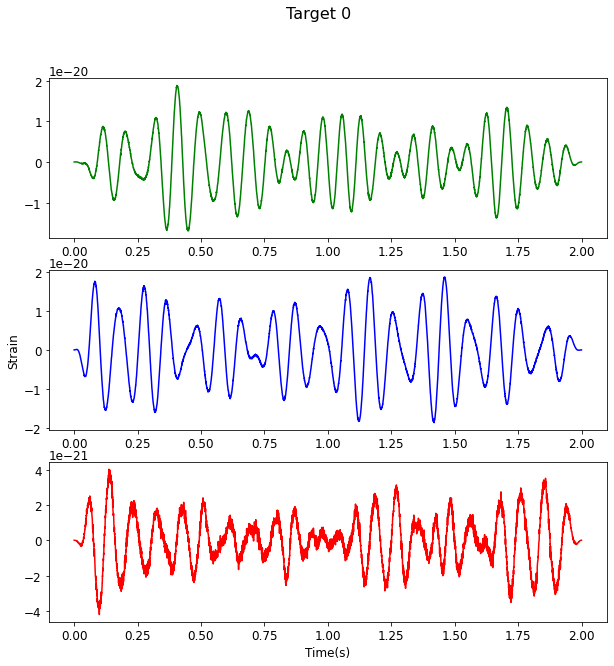

In [30]:
from scipy.signal import tukey
%matplotlib inline
data = glob.glob('/home/ian.harry/tmp_abi/train/0/0/0/0000c3b9c9.npy')


for filname in data:
    window = tukey(4096, alpha=0.1)
    ex_arr = np.load(filname)
    det1_ts = pycbc.types.TimeSeries(ex_arr[0], delta_t= 1./2048.)
    det1_ts = det1_ts * window 
    det2_ts = pycbc.types.TimeSeries(ex_arr[1], delta_t= 1./2048.) 
    det2_ts = det2_ts * window 
    det3_ts = pycbc.types.TimeSeries(ex_arr[2], delta_t= 1./2048.)
    det3_ts = det3_ts * window 

    
fig,a =  plt.subplots(3,1, figsize=(10,10))
fig.suptitle('Target 0', fontsize=16)
a[0].plot(det1_ts.sample_times,det1_ts,color='green')
a[1].plot(det2_ts.sample_times,det2_ts,color='blue')
a[2].plot(det3_ts.sample_times,det3_ts,color='red')
plt.sca(a[1])
plt.ylabel('Strain')
plt.sca(a[2])
plt.xlabel('Time(s)')
ts_noise = plt.gcf()

In [31]:
ts_noise.savefig('ts_noise.pdf',format='pdf',bbox_inches='tight')

In [33]:
import h5py
import lal
templates = h5py.File('/home/ian.harry/tmp_abi/template_bank/templates_097.h5', mode= 'r')
mass1s = (templates['mass1'][:1])
mass2s = (templates['mass2'][:1])
spin1z = (templates['spin1z'][:1])
spin2z = (templates['spin2z'][:1])
print(mass1s,mass2s,spin1z,spin2z)

[25.007824] [7.0988226] [-0.40184134] [-0.486915]


In [34]:
def f_lower(M_chirp):
    return (5**(3/8))/(8*np.pi*((M_chirp**(5/3)*1)**(3/8)))

In [40]:
%matplotlib inline
fig = py.figure(figsize=(8,5))
for m1, m2, s1z, s2z in zip(mass1s,mass2s,spin1z,spin2z):
    mu = ((m1*m2)/(m1+m2))
    M = m1+m2
    M_chirp = (mu**(3/5))*(M**(2/5))*lal.MTSUN_SI
    hp,hc = get_td_waveform(approximant="SEOBNRv4_opt",
                                                      mass1 = m1,
                                                      mass2 = m2, 
                                                      spin1z = s1z,
                                                      spin2z = s2z,
                                                      delta_t=1/2048,
                                                      f_lower=f_lower(M_chirp),
                                                      f_upper=1024)
    
    hp.resize(len(ts_t))
    #py.grid()
    #py.xlabel('Time(s)')

    #py.plot(hp.sample_times,hp, color = 'darkred')
    #gen_signal = plt.gcf()

<Figure size 576x360 with 0 Axes>

In [52]:
data = glob.glob('/home/ian.harry/tmp_abi/train/0/0/0/00001f4945.npy')
ts_t_list = []
for data in data:
    dat = np.load(data)

    for i in range(3):
        # convert the data to a TimeSeries instance
        ts_t = pycbc.types.TimeSeries(dat[i, :], epoch=0, delta_t=1.0/2048) 
        ts_t_list.append(ts_t)

In [ ]:
psd_list = []
for i in range(3):

    psd = ts_t_list[i].psd(1.)
    psd = interpolate(psd,ts_t_list[i].delta_f)
    psd = inverse_spectrum_truncation(psd, int(1.*ts_t_list[i].sample_rate),low_frequency_cutoff=20)
    psd_list.append(psd)

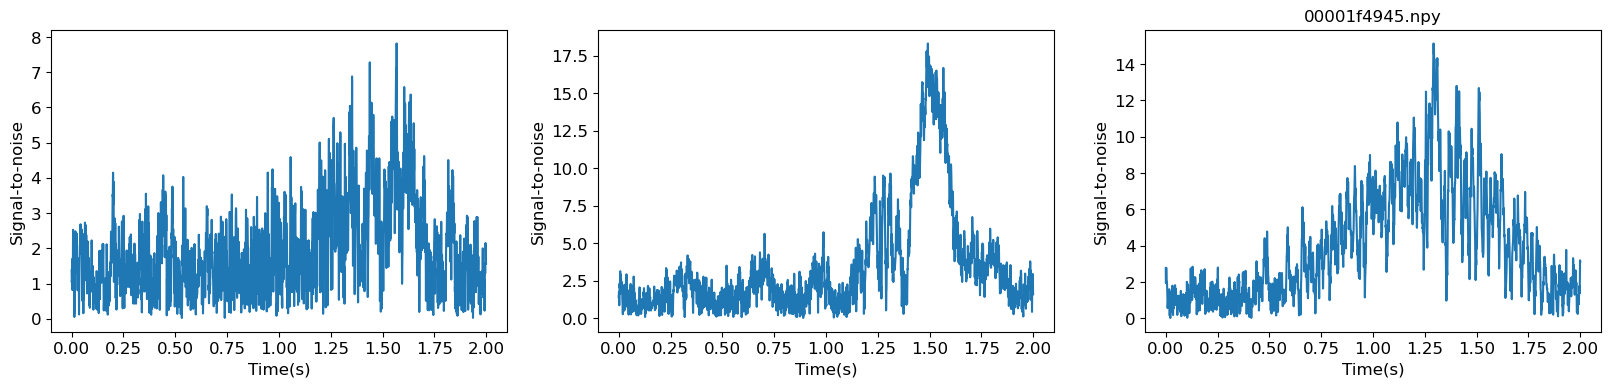

In [56]:
fig, axes = py.subplots(1, 3, figsize=[20,4], dpi=100)
py.title(os.path.basename(data))
for i in range(3):
    snr = matched_filter(hp,ts_t_list[i],psd=psd_list[i],low_frequency_cutoff=40) # compute the matched filter
    py.sca(axes[i])
    py.plot(snr.sample_times,abs(snr))#plot snr against time for each detector 
    py.ylabel('Signal-to-noise')
    py.xlabel('Time(s)')
match_wrap = plt.gcf()
py.show()


In [ ]:
match_wrap.savefig("match_wrap.pdf",format="pdf", box_inches = 'tight')